In [1]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda
from keras.layers import Embedding
from keras.layers import Convolution1D,MaxPooling1D, Flatten
from keras.datasets import imdb
from keras import backend as K
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.utils.np_utils import to_categorical

from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D
from keras.utils import np_utils
import numpy as np
import h5py
from keras import callbacks
from keras.layers import LSTM, GRU, SimpleRNN, Bidirectional
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

traindata = pd.read_csv('/home/ritika/NetworkIntrusionDetection/UNSW-NB15 - CSV Files/a part of training and testing set/UNSW_NB15_training-set.csv')
testdata = pd.read_csv('/home/ritika/NetworkIntrusionDetection/UNSW-NB15 - CSV Files/a part of training and testing set/UNSW_NB15_testing-set.csv')

traindata=traindata.drop('id',axis=1)
testdata=testdata.drop('id',axis=1)

from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

traindata['proto'] = lb_make.fit_transform(traindata['proto'])
traindata['service'] = lb_make.fit_transform(traindata['service'])
traindata['state'] = lb_make.fit_transform(traindata['state'])

testdata['proto'] = lb_make.fit_transform(testdata['proto'])
testdata['service'] = lb_make.fit_transform(testdata['service'])
testdata['state'] = lb_make.fit_transform(testdata['state'])

X = traindata.iloc[:,1:42]
Y = traindata.iloc[:,-1]
x = testdata.iloc[:,1:42]
y = testdata.iloc[:,-1]

Using TensorFlow backend.
/home/ritika/.virtualenvs/pythree/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ritika/.virtualenvs/pythree/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ritika/.virtualenvs/pythree/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ritika/.virtualen

In [2]:
Arr = X.values
arr = x.values

import librosa
Arr_Delta = librosa.feature.delta(Arr)
arr_delta = librosa.feature.delta(arr)

Delta = librosa.feature.delta(Arr_Delta)
delta = librosa.feature.delta(arr_delta)

Delta1 = pd.DataFrame(Arr_Delta)
delta1 = pd.DataFrame(arr_delta)
Delta2 = pd.DataFrame(Delta)
delta2 = pd.DataFrame(delta)

XDelta1 = pd.concat([X, Delta1, Delta2], axis=1)
xdelta1 = pd.concat([x, delta1, delta2], axis=1)

scaler = Normalizer().fit(XDelta1)
XDelta1 = scaler.transform(XDelta1)
scaler = Normalizer().fit(xdelta1)
xdelta1 = scaler.transform(xdelta1)

Y = np.array(Y)
y = np.array(y)

XDelta1 = np.reshape(XDelta1, (XDelta1.shape[0],1,XDelta1.shape[1]))
xdelta1 = np.reshape(xdelta1, (xdelta1.shape[0],1,xdelta1.shape[1]))

In [3]:
model = Sequential()
model.add(LSTM(4,input_dim=123))  # try using a GRU instead, for fun
model.add(Dropout(0.1))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

/home/ritika/.virtualenvs/pythree/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
/home/ritika/.virtualenvs/pythree/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(4, input_shape=(None, 123...)`
  


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4)                 2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 2,053
Trainable params: 2,053
Non-trainable params: 0
_________________________________________________________________


In [4]:
history = model.fit(XDelta1, Y, epochs=200, validation_data=(xdelta1, y))


Train on 175341 samples, validate on 82332 samples
Epoch 1/200
175341/175341 [==============================] - 45s 258us/step - loss: 0.4383 - accuracy: 0.7526 - val_loss: 0.5542 - val_accuracy: 0.7256
Epoch 2/200
175341/175341 [==============================] - 43s 245us/step - loss: 0.4065 - accuracy: 0.7687 - val_loss: 0.5628 - val_accuracy: 0.6849
Epoch 3/200
175341/175341 [==============================] - 43s 243us/step - loss: 0.4035 - accuracy: 0.7697 - val_loss: 0.5554 - val_accuracy: 0.6932
Epoch 4/200
175341/175341 [==============================] - 41s 235us/step - loss: 0.4018 - accuracy: 0.7692 - val_loss: 0.5475 - val_accuracy: 0.7142
Epoch 5/200
175341/175341 [==============================] - 44s 248us/step - loss: 0.4003 - accuracy: 0.7704 - val_loss: 0.5597 - val_accuracy: 0.6889
Epoch 6/200
175341/175341 [==============================] - 44s 249us/step - loss: 0.3994 - accuracy: 0.7707 - val_loss: 0.5505 - val_accuracy: 0.6877
Epoch 7/200
175341/175341 [=========

Epoch 53/200
175341/175341 [==============================] - 41s 232us/step - loss: 0.3300 - accuracy: 0.8490 - val_loss: 0.5224 - val_accuracy: 0.7126
Epoch 54/200
175341/175341 [==============================] - 42s 241us/step - loss: 0.3293 - accuracy: 0.8494 - val_loss: 0.5736 - val_accuracy: 0.7050
Epoch 55/200
175341/175341 [==============================] - 43s 246us/step - loss: 0.3291 - accuracy: 0.8505 - val_loss: 0.5236 - val_accuracy: 0.7123
Epoch 56/200
175341/175341 [==============================] - 41s 231us/step - loss: 0.3295 - accuracy: 0.8493 - val_loss: 0.5315 - val_accuracy: 0.7108
Epoch 57/200
175341/175341 [==============================] - 43s 243us/step - loss: 0.3290 - accuracy: 0.8499 - val_loss: 0.5319 - val_accuracy: 0.7122
Epoch 58/200
175341/175341 [==============================] - 44s 249us/step - loss: 0.3294 - accuracy: 0.8505 - val_loss: 0.5605 - val_accuracy: 0.7054
Epoch 59/200
175341/175341 [==============================] - 40s 230us/step - los

175341/175341 [==============================] - 40s 230us/step - loss: 0.3228 - accuracy: 0.8551 - val_loss: 0.5364 - val_accuracy: 0.7103
Epoch 107/200
175341/175341 [==============================] - 40s 225us/step - loss: 0.3230 - accuracy: 0.8547 - val_loss: 0.5208 - val_accuracy: 0.7142
Epoch 108/200
175341/175341 [==============================] - 40s 229us/step - loss: 0.3229 - accuracy: 0.8547 - val_loss: 0.5334 - val_accuracy: 0.7119
Epoch 109/200
175341/175341 [==============================] - 42s 242us/step - loss: 0.3229 - accuracy: 0.8550 - val_loss: 0.5248 - val_accuracy: 0.7132
Epoch 110/200
175341/175341 [==============================] - 42s 242us/step - loss: 0.3226 - accuracy: 0.8555 - val_loss: 0.5289 - val_accuracy: 0.7154
Epoch 111/200
175341/175341 [==============================] - 39s 225us/step - loss: 0.3232 - accuracy: 0.8551 - val_loss: 0.5657 - val_accuracy: 0.7117
Epoch 112/200
175341/175341 [==============================] - 43s 243us/step - loss: 0.32

175341/175341 [==============================] - 40s 226us/step - loss: 0.3206 - accuracy: 0.8560 - val_loss: 0.5598 - val_accuracy: 0.7117
Epoch 160/200
175341/175341 [==============================] - 42s 238us/step - loss: 0.3209 - accuracy: 0.8563 - val_loss: 0.5556 - val_accuracy: 0.7111
Epoch 161/200
175341/175341 [==============================] - 43s 244us/step - loss: 0.3205 - accuracy: 0.8566 - val_loss: 0.5594 - val_accuracy: 0.7096
Epoch 162/200
175341/175341 [==============================] - 41s 236us/step - loss: 0.3202 - accuracy: 0.8561 - val_loss: 0.5967 - val_accuracy: 0.7070
Epoch 163/200
175341/175341 [==============================] - 40s 231us/step - loss: 0.3207 - accuracy: 0.8562 - val_loss: 0.5743 - val_accuracy: 0.7072
Epoch 164/200
175341/175341 [==============================] - 43s 242us/step - loss: 0.3204 - accuracy: 0.8563 - val_loss: 0.5453 - val_accuracy: 0.7086
Epoch 165/200
175341/175341 [==============================] - 42s 240us/step - loss: 0.32

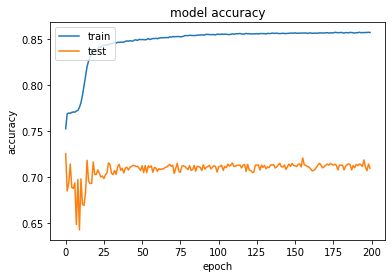

In [5]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('BinaryEFD2 + LSTM + Accuracy.png')
plt.show()

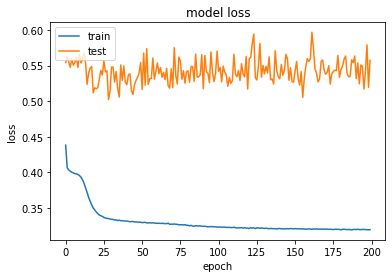

In [6]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('BinaryEFD2 + LSTM + Loss.png')
plt.show()

In [8]:
from sklearn.metrics import accuracy_score,classification_report
predictions = model.predict([xdelta1])
predictions = [0 if i<0.5 else 1 for i in predictions]
print("Accuracy: ",accuracy_score(y,predictions))
from sklearn.metrics import confusion_matrix

print("Classification Report: \n",classification_report(y,predictions))
conmat = np.array(confusion_matrix(y, predictions, labels=[0,1]))
confusion = pd.DataFrame(conmat, index=['negative', 'positive'],
                         columns=['predicted_negative','predicted_positive'])
print (confusion)

Accuracy:  0.7096390224942914
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.37      0.54     37000
           1       0.66      0.98      0.79     45332

    accuracy                           0.71     82332
   macro avg       0.81      0.68      0.66     82332
weighted avg       0.79      0.71      0.67     82332

          predicted_negative  predicted_positive
negative               13779               23221
positive                 685               44647
